In [29]:
import numpy as np
import spacy
import nltk
import re

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
#import nltk stopwords
stopwords = nltk.corpus.stopwords.words('english')

stopwords_lower = [s.lower() for s in stopwords]


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/karantank/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/karantank/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/karantank/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/karantank/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


In [6]:


def text_preprocessing(str_input): 
     #tokenization, remove punctuation, lemmatization
     words=[token.lemma_ for token in nlp(str_input) if not token.is_punct]
     # remove symbols, websites, email addresses 
     words = [re.sub(r"[^A-Za-z0-9@]", "", word) for word in words] 
     words = [re.sub(r"\S+com", "", word) for word in words]
     words = [re.sub(r"\S+@\S+", "", word) for word in words] 
     words = [word for word in words if word!=' ']
     words = [word for word in words if len(word)!=0] 
 
     #remove stopwords     
     words=[word.lower() for word in words if word.lower() not in stopwords_lower]
     #combine a list into one string   
     string = " ".join(words)
     return string


In [30]:

#open text file in read mode
text_file = open("data.txt", "r")

#read whole file to a string
input_text = text_file.read()
 
#close file
text_file.close()
    
preprocessed_text = text_preprocessing(input_text)
print(preprocessed_text)

good morning everyone thank join want start call today look back 2016 transformative year transformation difficult one especially challenge start 2016 reset focus people use twitter fast way see happen everyone talk reset refocus strength achieve one hard thing consumer service scale reverse reaccelerate usage thrilled report daily active usage accelerate third quarter row see strong growth continue make experience little well every single day may feel like change much past year hundred little change add predictable sustained growth use foundation inventive take big risk exactly go say last call revenue growth lag usage see number outlook prove case advertiser need approach apply consumer service reset focus strength mean clearly differentiate complement twitter real time nature prove advertiser twitter easy work customer 2016 challenge reaccelerate consumer usage give confidence 2017 challenge simplify differentiate revenue product take time show result want see move forward aggressiv

In [54]:




from nltk.tokenize import word_tokenize
tokenized_word=word_tokenize(preprocessed_text)


# # Stemming
# from nltk.stem import PorterStemmer
# from nltk.tokenize import sent_tokenize, word_tokenize

# ps = PorterStemmer()

# stemmed_words=[]
# for w in tokenized_word:
#     stemmed_words.append(ps.stem(w))

# #print("Filtered Sentence:",tokenized_word)
# #print("Stemmed Sentence:",stemmed_words)


from nltk.stem import WordNetLemmatizer
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in tokenized_word]

#print(lemm_text)
#print(' '.join(lemm_text))

<FreqDist with 477 samples and 1340 outcomes>
[('lot', 28), ('twitter', 25), ('people', 23), ('see', 22), ('make', 22), ('focus', 17), ('really', 17), ('go', 14), ('year', 13), ('use', 13)]


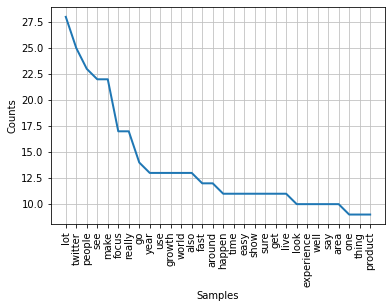

In [55]:

from nltk.probability import FreqDist
fdist = FreqDist(lemm_text)
print(fdist)
print(fdist.most_common(10))

import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()